In [1]:
from sklearn.model_selection import train_test_split #thư viện chia tập dữ liệu thành tập train và tập test
from tensorflow.keras.preprocessing.image import load_img, img_to_array #thư viện xử lý ảnh, load_img() để đọc ảnh, img_to_array() để chuyển ảnh thành mảng numpy
import numpy as np #thư viện tính toán
import pandas as pd #thư viện xử lý dữ liệu
import matplotlib.pyplot as plt #thư viện vẽ đồ thị
import os #thư viện hệ thống
import cv2 #thư viện xử lý ảnh

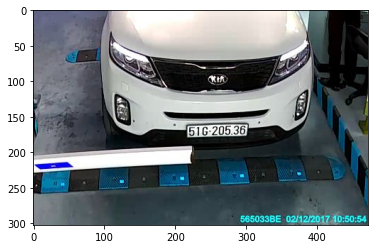

In [2]:
image = './test_imgs_for_h5new/9297.jpg'
img_arr = cv2.imread(image) #đọc ảnh
plt.imshow(img_arr)

In [3]:
h,w,d = img_arr.shape #lấy chiều cao, chiều rộng, số kênh màu của ảnh
print('Chiều cao: ', h , 'Chiều rộng: ', w, 'Số kênh màu: ', d)

Chiều cao:  303 Chiều rộng:  472 Số kênh màu:  3


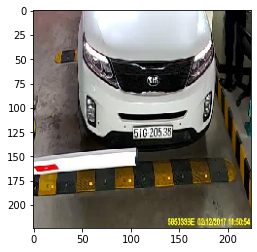

In [4]:
load_image = load_img(image,target_size=(224,224))
plt.imshow(load_image)

In [5]:
load_image_arr = img_to_array(load_image) #chuyển ảnh thành mảng numpy
print(load_image_arr)

[[[129.  98.  96.]
  [130.  99.  97.]
  [127.  96.  94.]
  ...
  [118. 126. 105.]
  [115. 124. 103.]
  [ 87.  99.  77.]]

 [[130.  99.  97.]
  [130.  99.  97.]
  [128.  97.  95.]
  ...
  [ 28.  35.  17.]
  [ 85.  94.  75.]
  [141. 153. 133.]]

 [[130.  99.  97.]
  [130.  99.  97.]
  [129.  98.  96.]
  ...
  [ 14.  21.   5.]
  [ 24.  31.  15.]
  [ 22.  31.  14.]]

 ...

 [[139. 134. 128.]
  [139. 134. 128.]
  [139. 134. 128.]
  ...
  [100.  94.  16.]
  [100.  98.  21.]
  [ 83.  79.  44.]]

 [[139. 134. 128.]
  [139. 134. 128.]
  [139. 134. 128.]
  ...
  [ 94.  87.  41.]
  [ 80.  77.  32.]
  [ 83.  79.  52.]]

 [[139. 134. 128.]
  [139. 134. 128.]
  [139. 134. 128.]
  ...
  [ 88.  87.  59.]
  [ 91.  92.  58.]
  [ 68.  63.  67.]]]


In [6]:
norm_load_image_arr = load_image_arr/255.0 # normalization ảnh, đưa các giá trị trong mảng về khoảng 0-1
print(norm_load_image_arr)

[[[0.5058824  0.38431373 0.3764706 ]
  [0.50980395 0.3882353  0.38039216]
  [0.49803922 0.3764706  0.36862746]
  ...
  [0.4627451  0.49411765 0.4117647 ]
  [0.4509804  0.4862745  0.40392157]
  [0.34117648 0.3882353  0.3019608 ]]

 [[0.50980395 0.3882353  0.38039216]
  [0.50980395 0.3882353  0.38039216]
  [0.5019608  0.38039216 0.37254903]
  ...
  [0.10980392 0.13725491 0.06666667]
  [0.33333334 0.36862746 0.29411766]
  [0.5529412  0.6        0.52156866]]

 [[0.50980395 0.3882353  0.38039216]
  [0.50980395 0.3882353  0.38039216]
  [0.5058824  0.38431373 0.3764706 ]
  ...
  [0.05490196 0.08235294 0.01960784]
  [0.09411765 0.12156863 0.05882353]
  [0.08627451 0.12156863 0.05490196]]

 ...

 [[0.54509807 0.5254902  0.5019608 ]
  [0.54509807 0.5254902  0.5019608 ]
  [0.54509807 0.5254902  0.5019608 ]
  ...
  [0.39215687 0.36862746 0.0627451 ]
  [0.39215687 0.38431373 0.08235294]
  [0.3254902  0.30980393 0.17254902]]

 [[0.54509807 0.5254902  0.5019608 ]
  [0.54509807 0.5254902  0.5019608 ]


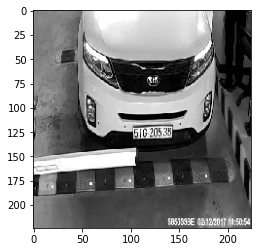

In [7]:
#Hiển thị ảnh sau khi chuẩn hóa
#Ảnh sau khi chuẩn hóa là ảnh màu xám
#Hiển thị ảnh xám
plt.imshow(norm_load_image_arr[:,:,0],cmap='gray')

In [9]:
#Lấy chỉ số bounding box của ảnh từ file csv
xmin,xmax,ymin,ymax = 214, 308, 159, 182
#Tính toán tọa độ bounding box sau khi resize ảnh
nxmin,nxmax = xmin/w,xmax/w
nymin,nymax = ymin/h,ymax/h
print(nxmin,nxmax,nymin,nymax)

0.4533898305084746 0.652542372881356 0.5247524752475248 0.6006600660066007
